# Chapter 5 Waveform Coding Techniques

## Example5.1 page 187

In [1]:
from __future__ import division

sigma_N = 10**-6 #the noise variance
k = 7 # separation constant for on-off signaling
M = 2 # number of discrete amplitude levels for NRZ polar
print 'The average transmitted power is:'
P = (k**2)*(sigma_N)*((M**2)-1)/12#
print P,"W"

The average transmitted power is:
1.225e-05 W


## Example5.2 page 189

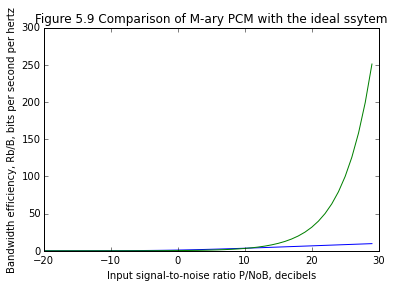

In [2]:
from __future__ import division
%matplotlib inline
from matplotlib.pyplot import plot,xlabel,ylabel,show,title,subplot


from math import log
def log2(x):
    return log(x,2)


#Channel Capacity theorem
P_NoB_dB = range(-20,30) #Input signal-to-noise ratio P/NoB, decibels
P_NoB = [10**(xx/10) for xx in P_NoB_dB]
k =7# # for M-ary PCM system#
Rb_B = [log2(1+(12/k**2))*yy for yy in P_NoB]##bandwidth efficiency in bits/sec/Hz
C_B = [log2(1+xxx) for xxx in P_NoB]##ideal system according to Shannon's channel capacity theorem
#plot
plot(P_NoB_dB,C_B)
plot(P_NoB_dB,Rb_B)
xlabel('Input signal-to-noise ratio P/NoB, decibels')
ylabel('Bandwidth efficiency, Rb/B, bits per second per hertz')
title('Figure 5.9 Comparison of M-ary PCM with the ideal ssytem')
show()

## Example5.3 page 192

In [1]:
from __future__ import division

#Channel Bandwidth B
n = 8 #  no. of bits used to encode
W = 4000 # the message signal banwidth in Hz
B = n*W#
print 'Channel width = %.2f Hz'%B
SNRo = 6*n - 7.2#
print 'Output Signal to noise ratio = %.2f dB'%SNRo


Channel width = 32000.00 Hz
Output Signal to noise ratio = 40.80 dB


## Example 5.5 Page 207

In [4]:
from __future__ import division
from numpy import pi,log10

a0 = 1 # The amplitude of sinusoidal signal
f0 = 4000 # the frequency of sinusoidal signal in Hz:
fs = 8000 #  the sampling frequency in samples per seconds
Ts = 1/fs##Sampling interval
delta = 2*pi*f0*a0*Ts##Step size to avoid slope overload
Pmax = (a0**2)/2##maximum permissible output power
sigma_Q = (delta**2)/3##Quantization error or noise variance
W = f0##Maximum message bandwidth
N = W*Ts*sigma_Q# #Average output noise power
SNRo = Pmax/N# # Maximum output signal-to-noise ratio
SNRo_dB = 10*log10(SNRo)#
print 'Maximum output signal-to-nosie = %.2f dB for Delta Modualtion:'%SNRo_dB

Maximum output signal-to-nosie = -5.17 dB for Delta Modualtion:


## Example 5.13(a) page 215

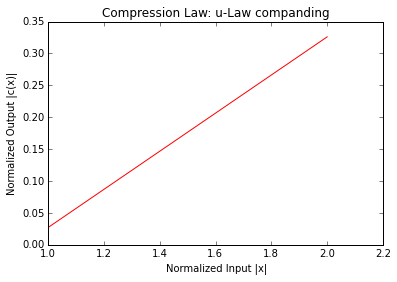

In [2]:
from __future__ import division
from numpy import arange,sign
from sympy import log
%matplotlib inline
from matplotlib.pyplot import plot,xlabel,ylabel,show,title,subplot

#Caption:u-Law companding
#Figure5.13(a)Mulaw companding Nonlinear Quantization
#Plotting mulaw characteristics for different 
#Values of mu

x = arange(0,0.01+1,0.01)# #Normalized input
mu = [0,5,255]##different values of mu
def mulaw(x,mu):
    """
    F(x) = sgn(x) ln(1 + μ|x|) / ln (1 + μ)
    -1 <= x <= 1
    """
    f=sign(x)*log(1+mu*abs(x))/log(1+mu)
    return  f
Cx=[]

for i in range(0,len(mu)):
    Cx.append(mulaw(x[i],mu[i]))
    plot(Cx)
title('Compression Law: u-Law companding')
xlabel('Normalized Input |x|')
ylabel('Normalized Output |c(x)|')
show()

## Example 5.13(b) page 216

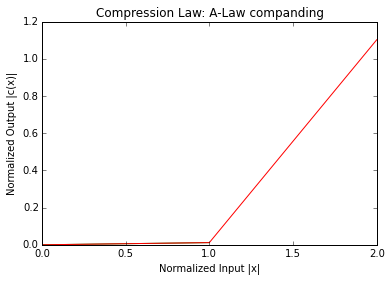

In [2]:
from __future__ import division
from numpy import arange,sign,log

%matplotlib inline
from matplotlib.pyplot import plot,xlabel,ylabel,show,title,subplot

#Caption:A-law companding
#Plotting A-law characteristics for different 
#Values of A

x = arange(0,0.01+1,0.01)# #Normalized input
A = [1,2,87.56]##different values of A


def Alaw(x,a):
    """F(x) = sgn(x) A |x| / (1 + lnA)  for  0   ≤|x| < 1/A
    
= sgn(x) (1+ln A|x|) /(1 + lnA) for   1/A  ≤|x| ≤ 1
"""
    if abs(x) >= 0 and abs(x) < 1/a:
        f = sign(x)*a*abs(x)/(1+log(a))
    elif abs(x) >= 1/a and abs(x) <=1:     
        f = sign(x)*(1+log(a*abs(x))/(1+log(a)))
    else:
        f = 'Wrong parameters'
    return f
Cx=[]
for i in range(0,len(A)):
    #[Cx(i,:),Xmax(i)] =  Alaw(x,A(i))#
    Cx.append(Alaw(x[i],A[i]))
    plot(Cx)
    
title('Compression Law: A-Law companding')
xlabel('Normalized Input |x|')
ylabel('Normalized Output |c(x)|')
show()